# Volume-weighted T/S Diagram from WOA

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import xarray as xr
import gsw

In [1]:
ds_salt = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/Avg_Decades_1981-2010/salt')
ds_temp = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/Avg_Decades_1981-2010/temp')
ds = xr.merge([ds_salt, ds_temp])
ds

NameError: name 'xr' is not defined

In [9]:
sbins = np.arange(31,38, 0.025)
tbins = np.arange(-2, 32, 0.1)

In [4]:
sst = ds.tan[0].load()
sss = ds.san[0].load()
ds_surf = xr.merge([sst, sss])

In [5]:
ds_surf

<xarray.Dataset>
Dimensions:  (lat: 180, lev: 102, lon: 360)
Coordinates:
    time     datetime64[ns] 2000-01-15
  * lev      (lev) float64 0.0 5.0 10.0 15.0 ... 5.2e+03 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    tan      (lev, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    san      (lev, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

In [10]:
from xhistogram.xarray import histogram
from matplotlib.colors import LogNorm

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


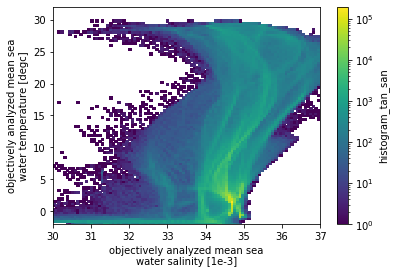

In [43]:
salt_bins = np.linspace(30, 37, 100)
theta_bins = np.linspace(-2, 32, 100)
ts_hist = histogram(ds_surf.tan, ds_surf.san, bins=[theta_bins, salt_bins])
ts_hist.where(ts_hist>0).plot(norm=LogNorm())

In [12]:
lower_lat = -79.88
upper_lat = -59.88
left_lon = -74.88
right_lon = 30.12

In [13]:
#set the boundaries
lat_range = dict(lat=slice(lower_lat, upper_lat))
lon_range = dict(lon=slice(left_lon, right_lon))

In [14]:
temp = ds.tan.sel(**lat_range, **lon_range)
salt = ds.san.sel(**lat_range, **lon_range)

In [ ]:
# Create a dz variable
dz = np.diff(ds.lev)
dz =np.insert(dz, 0, dz[0])
dz = xr.DataArray(dz, coords= {'lev':ds.lev}, dims='lev')

# weight by volume of grid cell (resolution = 5degree, 1degree=110km)
dVol = dz * (5*110e3) * (5*110e3*np.cos(ds.lat*np.pi/180))

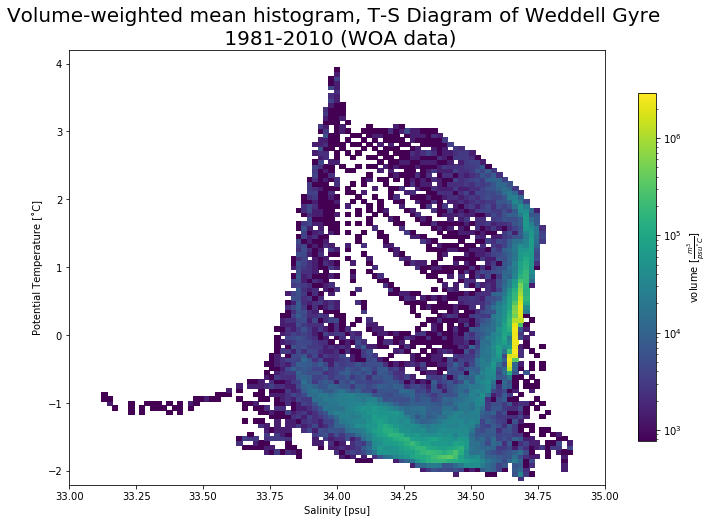

In [40]:
salt_bins = np.linspace(33, 35, 100)
theta_bins = np.linspace(-2.2, 4.2, 100)

delta_salt = salt_bins[1] - salt_bins[0]
delta_theta = theta_bins[1] - theta_bins[0]

ts_hist = histogram(temp, salt, bins=[theta_bins, salt_bins]) / (delta_salt * delta_theta)
ts_hist.where(ts_hist>0).plot(norm=LogNorm(), figsize=(12,8), 
                              cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'})

plt.xlabel('Salinity [psu]')
plt.ylabel('Potential Temperature [˚C]')
plt.title('Volume-weighted mean histogram, T-S Diagram of Weddell Gyre \n 1981-2010 (WOA data)', fontsize=20);

* You can take the difference between the scatter plots (ex: SOSE-WOA) and compare does the model have enough points
* this is a naive way - there is no weights involved, you have to figure that out yourself for WOA data - refer back to notes in Slack by Ryan and maybe xgcm package by Julius

## 2005 - 2017

In [35]:
ds_salt_0517 = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/2005-2017/salt')
ds_temp_0517 = xr.open_dataset('http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA18/1_deg/annual/2005-2017/temp')
ds_0517 = xr.merge([ds_salt_0517, ds_temp_0517])
ds_0517

<xarray.Dataset>
Dimensions:  (lat: 180, lev: 102, lon: 360, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15
  * lev      (lev) float64 0.0 5.0 10.0 15.0 ... 5.2e+03 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    san      (time, lev, lat, lon) float32 ...
    smn      (time, lev, lat, lon) float32 ...
    sdd      (time, lev, lat, lon) float32 ...
    ssd      (time, lev, lat, lon) float32 ...
    sse      (time, lev, lat, lon) float32 ...
    soa      (time, lev, lat, lon) float32 ...
    sgp      (time, lev, lat, lon) float32 ...
    tan      (time, lev, lat, lon) float32 ...
    tmn      (time, lev, lat, lon) float32 ...
    tdd      (time, lev, lat, lon) float32 ...
    tsd      (time, lev, lat, lon) float32 ...
    tse      (time, lev, lat, lon) float32 ...
    toa      (time, lev, lat, lon) float32 ...
    tgp      (time, lev, lat, lon) float32 ...

In [36]:
temp_0517 = ds_0517.tan.sel(**lat_range, **lon_range)
salt_0517 = ds_0517.san.sel(**lat_range, **lon_range)

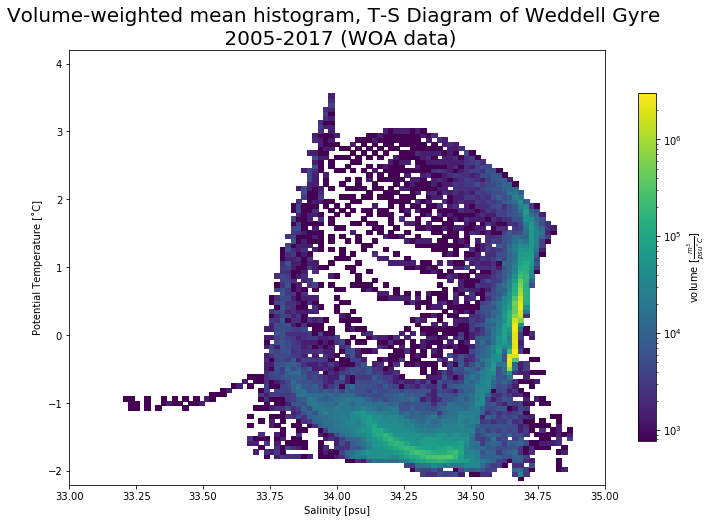

In [41]:
ts_hist_0517 = histogram(temp_0517, salt_0517, bins=[theta_bins, salt_bins]) / (delta_salt * delta_theta)
ts_hist_0517.where(ts_hist_0517>0).plot(norm=LogNorm(), figsize=(12,8), 
                                        cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'})

plt.xlabel('Salinity [psu]')
plt.ylabel('Potential Temperature [˚C]')
plt.title('Volume-weighted mean histogram, T-S Diagram of Weddell Gyre \n 2005-2017 (WOA data)', fontsize=20);